<a href="https://colab.research.google.com/github/ThodupunooriSaiManish/Deep_Learning/blob/main/DL_Lab(Semester_6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week_1(19/01/26)

In [1]:
#1 Build a Simple Neural Network with PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

model = nn.Linear(1, 1)

loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(500):
    pred = model(x)
    loss = loss_fn(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

test = torch.tensor([[5.0]])
print("Prediction:", model(test).item())

Prediction: 9.755949020385742


In [ ]:
#2 Simple Neural Network with TensorFlow
import tensorflow as tf
import numpy as np

x = np.array([1, 2, 3, 4], dtype=float)
y = np.array([2, 4, 6, 8], dtype=float)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='sgd', loss='mse')

model.fit(x, y, epochs=500, verbose=0)

test = np.array([5.0])
prediction = model.predict(test, verbose=0)

print("Prediction:", prediction[0][0])

Prediction: 9.95343


In [ ]:
#3 Simple Neural Network with Using Keras (via tf.keras)
import tensorflow as tf
import numpy as np

x = np.array([1, 2, 3, 4], dtype=float)
y = np.array([2, 4, 6, 8], dtype=float)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer='sgd',
    loss='mean_squared_error'
)

model.fit(x, y, epochs=300, verbose=0)

test_data = np.array([5.0])
prediction = model.predict(test_data, verbose=0)

print("Prediction:", prediction[0][0])

Prediction: 9.861242


In [ ]:
#3 IMPLEMENT A SIMPLE PERCEPTRON (Coding a Neuron) and explain the meaning of feed-forward, step, and sigmoid functions
import math

def step_function(x):
    return 1 if x >= 0 else 0

def perceptron(inputs, weights, bias):
    weighted_sum = 0
    for i in range(len(inputs)):
        weighted_sum += inputs[i] * weights[i]

    weighted_sum += bias
    output = step_function(weighted_sum)
    return output

inputs = [1, 0]
weights = [0.7, -0.4]
bias = -0.2

print("Perceptron Output:", perceptron(inputs, weights, bias))

Perceptron Output: 1


Week_2(2/2/26)

In [ ]:
#1 Implement AND and OR logic operations using a single perceptron, and verify the correctness of the output using appropriate truth tables. (linear Data)
def step_function(net):
    if net >= 0:
        return 1
    else:
        return 0

def perceptron(x1, x2, w1, w2, b):
    net = x1 * w1 + x2 * w2 + b
    y = step_function(net)
    return net, y

print("AND Gate (with Step Function Output)")
print("x1 x2|Net Input|Step Output")

for x1 in [0, 1]:
    for x2 in [0, 1]:
        net, y = perceptron(x1, x2, 1, 1, -1.5)
        print(x1, x2, "|", net, "|", y)

print("\nOR Gate (with Step Function Output)")
print("x1 x2|Net Input|Step Output")

for x1 in [0, 1]:
    for x2 in [0, 1]:
        net, y = perceptron(x1, x2, 1, 1, -0.5)
        print(x1, x2, "|", net, "|", y)

AND Gate (with Step Function Output)
x1 x2|Net Input|Step Output
0 0 | -1.5 | 0
0 1 | -0.5 | 0
1 0 | -0.5 | 0
1 1 | 0.5 | 1

OR Gate (with Step Function Output)
x1 x2|Net Input|Step Output
0 0 | -0.5 | 0
0 1 | 0.5 | 1
1 0 | 0.5 | 1
1 1 | 1.5 | 1


In [ ]:
#2 Examine the feasibility of implementing the XOR and XNOR (¬XOR) operations (Non linear data) using a single perceptron.
# If not possible, clearly explain the reason based on the concept of linear separability.
def step(net):
    return 1 if net >= 0 else 0

def perceptron(x1, x2, w1, w2, b):
    net = x1*w1 + x2*w2 + b
    return step(net)

def AND(x1, x2):
    return perceptron(x1, x2, 1, 1, -1.5)

def OR(x1, x2):
    return perceptron(x1, x2, 1, 1, -0.5)

def NOT(x):
    return step(-1*x + 0.5)

#XOR: (A OR B) AND NOT(A AND B)
def XOR_attempt(x1, x2):
    or_out = OR(x1, x2)
    and_out = AND(x1, x2)
    not_and = NOT(and_out)
    return AND(or_out, not_and)

#XNOR: NOT(XOR)
def XNOR_attempt(x1, x2):
    return NOT(XOR_attempt(x1, x2))

print("XOR using AND, OR, NOT (Single Perceptron)")
print("x1 x2|Input|Output")

for x1 in [0, 1]:
    for x2 in [0, 1]:
        print(x1, x2, "|", net,"|", XOR_attempt(x1, x2))

print("\nXNOR using AND, OR, NOT (Single Perceptron)")
print("x1 x2|Input|Output")

for x1 in [0, 1]:
    for x2 in [0, 1]:
        print(x1, x2, "|", net, "|", XNOR_attempt(x1, x2))

XOR using AND, OR, NOT (Single Perceptron)
x1 x2|Input|Output
0 0 | 1.5 | 0
0 1 | 1.5 | 1
1 0 | 1.5 | 1
1 1 | 1.5 | 0

XNOR using AND, OR, NOT (Single Perceptron)
x1 x2|Input|Output
0 0 | 1.5 | 1
0 1 | 1.5 | 0
1 0 | 1.5 | 0
1 1 | 1.5 | 1


XOR can be expressed using AND, OR, and NOT operations, implementing it using only single perceptrons fails because XOR is not linearly separable. A single perceptron can only form linear decision boundaries. Hence, XOR and XNOR require a multi-layer perceptron with at least one hidden layer.

In [ ]:
#3 Implement the XOR and (¬XOR) logic operation using a multi-perceptron network,
# and analyze how multiple perceptrons overcome the limitations of a single perceptron.
def step(net):
    return 1 if net >= 0 else 0

def perceptron(x1, x2, w1, w2, b):
    net = x1*w1 + x2*w2 + b
    return step(net)

def AND(x1, x2):
    return perceptron(x1, x2, 1, 1, -1.5)

def OR(x1, x2):
    return perceptron(x1, x2, 1, 1, -0.5)

def NOT(x):
    return step(-1*x + 0.5)

def XOR(x1, x2):
    h1 = OR(x1, x2)
    h2 = AND(x1, x2)
    h2_not = NOT(h2)
    return AND(h1, h2_not)

def XNOR(x1, x2):
    return NOT(XOR(x1, x2))

print("XOR using Multi-Perceptron Network")
print("x1 x2|Input |Output")

for x1 in [0, 1]:
    for x2 in [0, 1]:
        print(x1, x2, "|", net, "|", XOR(x1, x2))

print("\nXNOR using Multi-Perceptron Network")
print("x1 x2|Input |Output")

for x1 in [0, 1]:
    for x2 in [0, 1]:
        print(x1, x2, "|", net, "|", XNOR(x1, x2))

XOR using Multi-Perceptron Network
x1 x2|Input |Output
0 0 | 1.5 | 0
0 1 | 1.5 | 1
1 0 | 1.5 | 1
1 1 | 1.5 | 0

XNOR using Multi-Perceptron Network
x1 x2|Input |Output
0 0 | 1.5 | 1
0 1 | 1.5 | 0
1 0 | 1.5 | 0
1 1 | 1.5 | 1


In [ ]:
#4 Demonstrate that the thresholding logic used by perceptron is very harsh.
def step(net):
    return 1 if net >= 0 else 0

def perceptron(x1, x2, w1, w2, b):
    net = x1*w1 + x2*w2 + b
    return net, step(net)


w1, w2, b = 1, 1, -1.5
print("Demonstrating Harsh Thresholding (AND Gate)")
print("x1 x2 | Net Input | Output")

inputs = [(1, 1), (0.99, 1), (1, 0.99), (0.9, 1)]
for x1, x2 in inputs:
    net, y = perceptron(x1, x2, w1, w2, b)
    print(round(x1,2), round(x2,2), " | ", round(net,2), " | ", y)

Demonstrating Harsh Thresholding (AND Gate)
x1 x2 | Net Input | Output
1 1  |  0.5  |  1
0.99 1  |  0.49  |  1
1 0.99  |  0.49  |  1
0.9 1  |  0.4  |  1


In [ ]:
#5 Implement the Perceptron Learning Algorithm and
# study the effect of weight updates on convergence for a binary decision problem such as determining whether a user would like to watch a movie.
import pandas as pd

df = pd.DataFrame({
    "f1":[1,0,1,0,0],     # Matt Damon
    "f2":[1,1,0,0,1],     # Thriller
    "f3":[0,1,1,0,0],     # Nolan
    "f4":[0.9,0.7,0.6,0.3,0.4],  # IMDb
    "y":[1,1,1,0,0]       # Like
})

df.to_csv("movies.csv", index=False)

In [ ]:
import numpy as np
data = pd.read_csv("movies.csv")
X = data.iloc[:,:4].values
y = data.iloc[:,4].values

def step(x):
    return 1 if x >= 0 else 0

In [ ]:
print("MP Perceptron")
for i in range(len(X)):
    print(step(sum(X[i])-2), "Actual:", y[i])

MP Perceptron
1 Actual: 1
1 Actual: 1
1 Actual: 1
0 Actual: 0
0 Actual: 0


In [ ]:
w = np.zeros(4)
lr = 0.1

for i in range(len(X)):
    y_pred = step(np.dot(w, X[i]))
    w += lr * (y[i]-y_pred) * X[i]

print("Weights only:", w)

Weights only: [ 0.    0.    0.   -0.03]


In [ ]:
w = np.zeros(4)
b = 0

for i in range(len(X)):
    y_pred = step(np.dot(w, X[i]) + b)
    w += lr * (y[i]-y_pred) * X[i]
    b += lr * (y[i]-y_pred)

print("Weights:", w, "Bias:", b)

Weights: [ 0.    0.    0.   -0.03] Bias: -0.1


In [ ]:
sample = np.array([1,0,0,0.8])
print("Prediction:", step(np.dot(w, sample) + b))

Prediction: 0


MP Perceptron fails because it does not update weights.
Perceptron with weights learns feature importance but lacks flexibility without bias.
Adding bias improves convergence and classification accuracy.
Weight and bias updates are essential for effective learning in perceptron models.

In [5]:
#6 Demonstrate the Representation Power of a Network of Perceptrons
import numpy as np

X = np.array([[0,0],[0,1],[1,0],[1,1]])

# Step function
def step(net):
    return 1 if net >= 0 else 0

# Perceptron training function
def train_perceptron(y, epochs=20, lr=0.1):
    w = np.zeros(2)
    b = 0
    for _ in range(epochs):
        for i in range(4):
            pred = step(np.dot(w, X[i]) + b)
            w += lr * (y[i] - pred) * X[i]
            b += lr * (y[i] - pred)
    return w, b

# Generating all 16 Boolean functions
boolean_functions = []
for i in range(16):
    boolean_functions.append(
        [(i >> j) & 1 for j in range(4)][::-1]
    )

not_learnable = []

# Testing each Boolean function
for idx, y in enumerate(boolean_functions):
    w, b = train_perceptron(y)
    preds = [step(np.dot(w, X[i]) + b) for i in range(4)]
    if preds != y:
        not_learnable.append(idx+1)

print("Total Boolean functions:", 16)
print("Not learnable by single perceptron:", not_learnable)
print("Count:", len(not_learnable))

Total Boolean functions: 16
Not learnable by single perceptron: [7, 10]
Count: 2


In [4]:
import math

for n in [2, 3, 4]:
    total = 2 ** (2 ** n)
    print(f"Inputs = {n}, Total Boolean functions = {total}")

Inputs = 2, Total Boolean functions = 16
Inputs = 3, Total Boolean functions = 256
Inputs = 4, Total Boolean functions = 65536


A) 2^2^n


A single perceptron can represent only linearly separable Boolean functions. For two inputs, out of 16 Boolean functions, only 14 are linearly separable, while XOR and XNOR are not. As the number of inputs increases, the number of non-linearly separable Boolean functions grows exponentially, demonstrating the limited representation power of a single perceptron and the need for multi-layer networks.

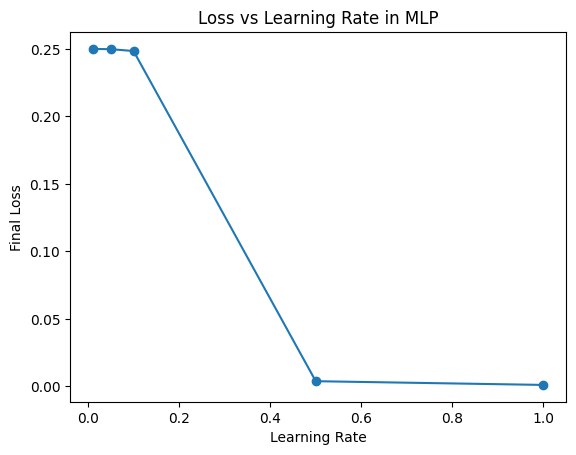

In [6]:
#9 Implement an MLP by varying bias, weights, and learning rate, and record observations for different learning rate values.
#Plot a graph showing the relationship between loss (error) and learning rate.
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0]
losses = []

for lr in learning_rates:
    # Initializing weights and bias
    np.random.seed(1)
    W1 = np.random.rand(2,2)
    b1 = np.random.rand(1,2)
    W2 = np.random.rand(2,1)
    b2 = np.random.rand(1,1)

    # Training
    for epoch in range(2000):
        # Forward pass
        h = sigmoid(np.dot(X, W1) + b1)
        y_pred = sigmoid(np.dot(h, W2) + b2)

        # Loss (MSE)
        loss = np.mean((y - y_pred) ** 2)

        # Backpropagation
        d_out = (y - y_pred) * sigmoid_derivative(y_pred)
        d_h = np.dot(d_out, W2.T) * sigmoid_derivative(h)

        # Update weights and bias
        W2 += lr * np.dot(h.T, d_out)
        b2 += lr * np.sum(d_out, axis=0)
        W1 += lr * np.dot(X.T, d_h)
        b1 += lr * np.sum(d_h, axis=0)

    losses.append(loss)

plt.plot(learning_rates, losses, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Final Loss")
plt.title("Loss vs Learning Rate in MLP")
plt.show()

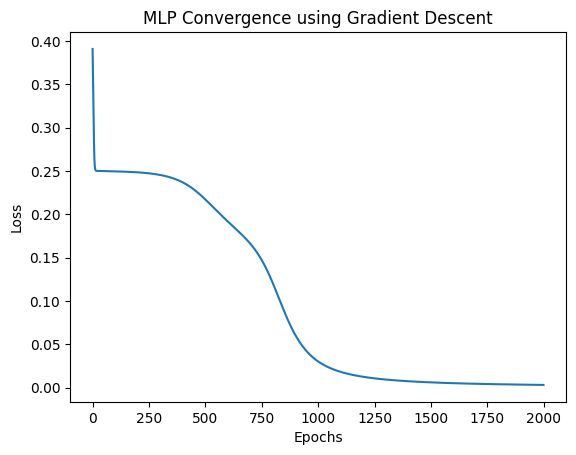

Final Predictions:
[0 0] → 0
[0 1] → 1
[1 0] → 1
[1 1] → 0


In [8]:
#10 Implement an MLP using the Gradient Descent algorithm, and analyze the convergence behavior and performance of the network.
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initializing weights and bias
np.random.seed(0)
W1 = np.random.rand(2,2)
b1 = np.random.rand(1,2)
W2 = np.random.rand(2,1)
b2 = np.random.rand(1,1)

lr = 0.5
epochs = 2000
losses = []

# Gradient Descent Training
for _ in range(epochs):
    # Forward pass
    h = sigmoid(np.dot(X, W1) + b1)
    y_pred = sigmoid(np.dot(h, W2) + b2)

    # Loss (MSE)
    loss = np.mean((y - y_pred)**2)
    losses.append(loss)

    # Backpropagation
    d_out = (y - y_pred) * sigmoid_derivative(y_pred)
    d_h = np.dot(d_out, W2.T) * sigmoid_derivative(h)

    # Gradient descent updates
    W2 += lr * np.dot(h.T, d_out)
    b2 += lr * np.sum(d_out, axis=0)
    W1 += lr * np.dot(X.T, d_h)
    b1 += lr * np.sum(d_h, axis=0)

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("MLP Convergence using Gradient Descent")
plt.show()

print("Final Predictions:")
for i in range(len(X)):
    pred = int(y_pred[i][0] >= 0.5)
    print(X[i], "→", pred)

In [9]:
#11 Implement a Perceptron on IRIS Dataset what are your observations with respect to learning rate using Perceptron class in sklearn.
# (explore all the parameters of Perceptron class).

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load Iris dataset (binary classification: Setosa vs Non-Setosa)
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)

# Feature scaling (important for perceptron)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]

print("Learning Rate  |  Train Acc  |  Test Acc")
print("------------------------------------------")

for lr in learning_rates:
    clf = Perceptron(
        eta0=lr,          # learning rate
        max_iter=1000,
        tol=1e-3,
        random_state=42
    )
    clf.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    print(f"{lr:<13} {train_acc:.2f}        {test_acc:.2f}")

Learning Rate  |  Train Acc  |  Test Acc
------------------------------------------
0.0001        1.00        1.00
0.001         1.00        1.00
0.01          1.00        1.00
0.1           1.00        1.00
1.0           1.00        1.00
